In [32]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import roc_auc_score
import seaborn as sb
import time
import matplotlib.pyplot as plt


In [57]:
#mengubah menjadi format time series dan datetime sebagai index
df = pd.read_csv('/content/drive/MyDrive/Machine Leaning/household_power_consumption.txt', 
                 sep = ';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]},na_values = '?', dtype = float)

In [62]:
df

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [63]:
# menghitung total pemakaian
eq2 = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['kosumsi daya'] = eq2
df.tail(10)

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,kosumsi daya
2075249,2010-11-26 20:53:00,0.944,0.0,238.72,4.0,0.0,0.0,0.0,0.0
2075250,2010-11-26 20:54:00,0.946,0.0,239.31,4.0,0.0,0.0,0.0,0.0
2075251,2010-11-26 20:55:00,0.946,0.0,239.74,4.0,0.0,0.0,0.0,0.0
2075252,2010-11-26 20:56:00,0.942,0.0,239.41,4.0,0.0,0.0,0.0,0.0
2075253,2010-11-26 20:57:00,0.946,0.0,240.33,4.0,0.0,0.0,0.0,0.0
2075254,2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0,0.0
2075255,2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0,0.0
2075256,2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0,0.0
2075257,2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0,0.0
2075258,2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0,0.0


In [64]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,kosumsi daya
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,8.878891e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,1.286300e+01
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.800000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.340000e+02


In [65]:
df.dtypes

datetime                 datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
kosumsi daya                    float64
dtype: object

In [66]:
df.shape

(2075259, 9)

In [67]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
 8   kosumsi daya           float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 142.5 MB


In [68]:
#check null data missing value
df.isnull().sum()

datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
kosumsi daya             25979
dtype: int64

In [69]:
#preprosessing data clearning dan handle missing value
# mengisi data yang hilang dengan nilai rata-rata
for columns in df.iloc[:, 0:]:
  df[columns].fillna(value = df[columns].mean(), inplace = True)
pass
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

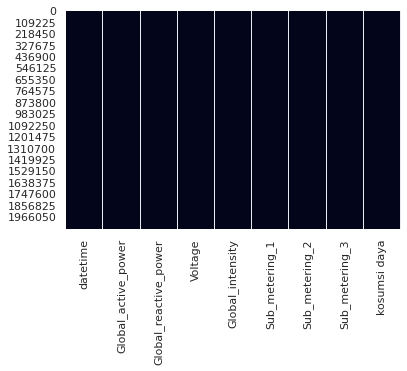

In [70]:
sb.heatmap(df.isnull(), cbar=False) #headmap missing value

In [114]:
df_copy = df.copy()

In [116]:
#preprosessing
df_feature = df_copy[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'kosumsi daya']]
df_feature.head()

,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,kosumsi daya
0,4.216,0.0,1.0,17.0,18.0
1,5.360,0.0,1.0,16.0,17.0
2,5.374,0.0,2.0,17.0,19.0
3,5.388,0.0,1.0,17.0,18.0
4,3.666,0.0,1.0,17.0,18.0


In [117]:
Scaler = MinMaxScaler()
df_scaler = Scaler.fit_transform(df_feature)

In [119]:
df_scaler = pd.DataFrame(
    df_scaler,
    columns=[
             'Global_active_power', 
             'Sub_metering_1', 
             'Sub_metering_2', 
             'Sub_metering_3',
             'kosumsi daya'
    ]
)
df_scaler.head(5)

,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,kosumsi daya
0,0.374796,0.0,0.0125,0.548387,0.134328
1,0.478363,0.0,0.0125,0.516129,0.126866
2,0.479631,0.0,0.0250,0.548387,0.141791
3,0.480898,0.0,0.0125,0.548387,0.134328
4,0.325005,0.0,0.0125,0.548387,0.134328


In [120]:
df_scaler.describe()

,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,kosumsi daya
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,9.194415e-02,1.274913e-02,1.623150e-02,2.083370e-01,6.626038e-02
std,9.511638e-02,6.948178e-02,7.231838e-02,2.704573e-01,9.538980e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.118414e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.015390e-02,0.000000e+00,0.000000e+00,3.225806e-02,7.462687e-03
75%,1.307261e-01,0.000000e+00,1.250000e-02,5.483871e-01,1.343284e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


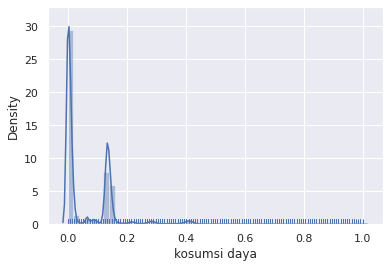

In [83]:
#EDA
sb.distplot(df_scaler['kosumsi daya'], kde=True, rug=True)

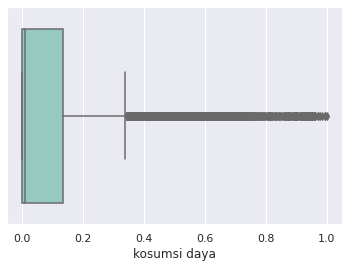

In [94]:
#outlier dari dati tersebut yang ditunjuk warna hitam
sb.boxplot(x=df_scaler["kosumsi daya"], palette="Set3")

In [141]:
pca = PCA(n_components=2).fit_transform(df_scaler)


In [145]:
pca_df = pd.DataFrame(pca, columns=['pca1', 'pca2'])
pca_df

,pca1,pca2
0,0.401585,0.064076
1,0.394219,0.123694
2,0.429091,0.127187
3,0.426866,0.118493
4,0.389721,0.038539
...,...,...
2075254,-0.216218,0.013423
2075255,-0.216261,0.013330
2075256,-0.216391,0.013052
2075257,-0.216477,0.012866


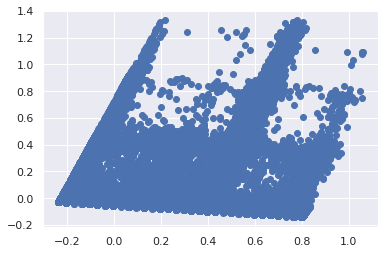

In [146]:
plt.scatter(x=pca_df['pca1'], y=pca_df['pca2'])

In [112]:
target = df_scaler['kosumsi daya']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(pca, target, random_state=0)


[[ 0.48833223  0.22647704 -0.06519384  0.18605101]
 [ 0.51069535  0.33672851 -0.06751443  0.18880551]
 [ 0.54741897  0.34597399 -0.06784008  0.22947953]
 ...
 [-0.21137054  0.03829708 -0.05465251 -0.07875394]
 [-0.2109781   0.03966154 -0.05823077 -0.07867837]
 [-0.21042091  0.04147839 -0.06265867 -0.07860025]]
